## ****Problem 1****

**Task 1**

You task here is to go through [this link](https://www.kaggle.com/datasets/andonians/random-linear-regression) and perform simple linear regression using sklearn. Then you must submit your work here as well as on the dataset above in kaggle website. Share the link of your notebook on kaggle along with your notebook on github.

Solution:<br>
The kaggle [link](https://www.kaggle.com/kaiju8/ml-1-assignment-problem-1-task-1) to the notebook

**Task 2**

Apply polynomial regression on this [link](https://www.kaggle.com/datasets/shubhankitsirvaiya06/diamond-price-prediction). Submit your notebook to github as well as kaggle. Share kaggle link.

Solution:<br>
The kaggle [link](https://www.kaggle.com/code/kaiju8/ml-1-assignment-problem-1-task-2) to the notebook

**Task 3**

Go through [this notebook](https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression/notebook). No need to code :P . Just see why the assumptions to linear regression are important as discussed in the lecture.

## **Problem 2**

Pendigits is a handwritten digits dataset. The train set can be accessed [here](http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra) and the test set can be accessed [here](http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes). The dataset is available as a text file (can be opened in Notepad).

**Task 1**

Your first task is to parse this text based data into a pandas dataframe.

Also, to impress Ajit sir, plot one digit each of label 4, 0, 8 using matplotlib.

Solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats

In [2]:
train_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra")
test_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes")
#column_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.names")

train_data=pd.read_csv(train_url,header=None)
test_data=pd.read_csv(test_url,header=None)
#columns=pd.read_csv(column_url)

In [3]:
#Renaming Columns
train_data.columns = ['x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8','digit']
test_data.columns = ['x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8','digit']
X_columns = ['x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8']
y_columns = ['digit']

In [4]:
test_data.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,digit
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [5]:
#train_data.sort_values(by=['digit'])

In [6]:
def toget(x):
    datax_train = train_data.loc[train_data['digit'] == x]
    datax_train = datax_train.sample(frac = 1)
    datax_train_random = datax_train.iloc[0,:-1]
    draw(datax_train_random)

In [7]:
def draw(df):
    X=[df.loc[x] for x in ['x1','x2','x3','x4','x5','x6','x7','x8']]
    Y=[df.loc[y] for y in ['y1','y2','y3','y4','y5','y6','y7','y8']]
    plt.plot(X,Y)
    plt.show()

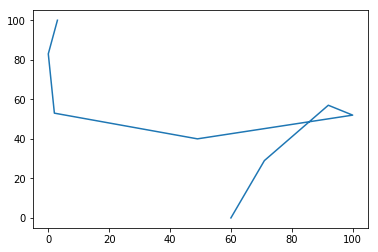

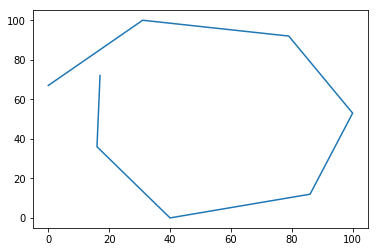

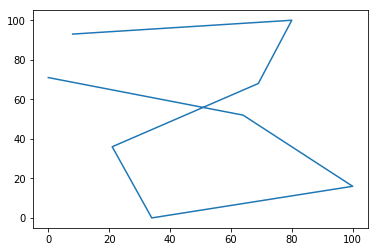

In [8]:
for i in [4,0,8]:
    toget(i)

**Task 2**

Next, train a logistic classifier on these digits and find the accuracy on the test set. For this, you can use any Python library available 🤟.

Solution:

In [9]:
X_train = np.array(train_data.loc[:,X_columns])
y_train = np.array(train_data.loc[:,y_columns])

In [10]:
X_test = np.array(test_data.loc[:,X_columns])
y_test = np.array(test_data.loc[:,y_columns])

In [11]:
from sklearn.linear_model import LogisticRegression
logistic_r_model=LogisticRegression().fit(X_train, y_train.ravel())
y_pred_logistic = logistic_r_model.predict(X_test)

In [12]:
train_score = logistic_r_model.score(X_train,y_train)
print("The R2 score on train set ",train_score)

The R2 score on train set  0.9471577261809447


In [13]:
test_score = logistic_r_model.score(X_test,y_test)
print("The R2 score on test set ",test_score)

The R2 score on test set  0.8902229845626072


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

             precision    recall  f1-score   support

          0       0.97      0.88      0.92       363
          1       0.76      0.77      0.77       364
          2       0.94      0.98      0.96       364
          3       0.96      0.98      0.97       336
          4       0.95      0.95      0.95       364
          5       0.72      0.83      0.77       335
          6       0.99      0.96      0.98       336
          7       0.99      0.82      0.90       364
          8       0.83      0.90      0.86       336
          9       0.85      0.84      0.84       336

avg / total       0.90      0.89      0.89      3498



We can see that this model has certain issues

In [15]:
from sklearn.metrics import confusion_matrix
matrix_lr = confusion_matrix(y_test, y_pred_logistic)

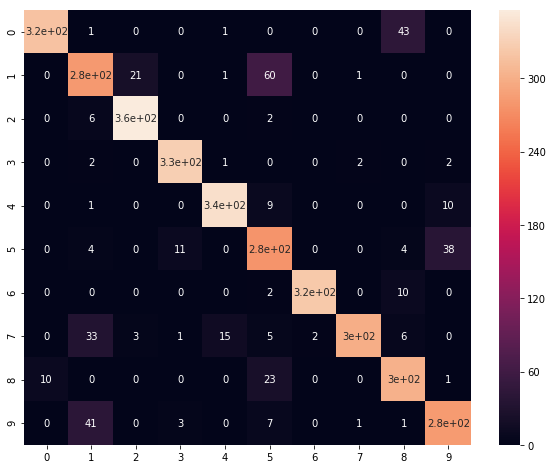

In [16]:
import seaborn as sn

df_cm = pd.DataFrame(matrix_lr, index = [i for i in "0123456789"],columns = [i for i in "0123456789"])
plt.figure(figsize = (10,8))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sn.heatmap(df_cm, annot=True)
plt.show()

We can see certain patterns in the misclassifications

**Task 3**

Next, you need to use the KNN classifier on this dataset. Use k = 1.

For this, you need to implement your solution as a Python class with the following format:

class KNN:
    def __init__(self, k, ...):
        # initialize data parameters
        ...
        
    def load(self, dataset):
        # store dataset
        ...
        
    def distance(self, p1, p2):
        # calculate L2 distance
        ...
        
    def predict(self, test_point):
        # predict the class of the test_point
        ...
Also, make sure to find the accuracy on the test set.


In [17]:
class KNN:
    def __init__(self, k):
        # initialize data parameters
        self.k=k
        
    def load(self, dataset, X_columns, y_columns):
        # store dataset
        self.X = np.array(dataset.loc[:,X_columns])
        self.y = np.array(dataset.loc[:,y_columns])
        
    def distance(self, p1, p2):
        # calculate L2 distance
        dist=[]
        for p in p1:
            dist.append(np.linalg.norm(p - p2))
            
        return np.array(dist)
    
    def predict(self, test_point):
        # predict the class of the test_point
        
        y_pred=[]
        for point in test_point:
            distances = self.distance(self.X ,point)
            #print(distances)
            
            nearest_neighbors_id = distances.argsort()[:self.k]
            nearest_neighbors_y = self.y[nearest_neighbors_id]
            y_prediction_i = scipy.stats.mode(nearest_neighbors_y).mode[0]
            y_pred.append(y_prediction_i)
            #print(y_pred)
        return y_pred

In [18]:
knn_model=KNN(1)
knn_model.load(train_data, X_columns, y_columns)
y_pred_knn = np.array(knn_model.predict(X_test))

In [19]:
from sklearn.metrics import accuracy_score
print("The R2 score is ",accuracy_score(y_test, y_pred_knn))

The R2 score is  0.9774156660949114


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.array(y_pred_knn)))


             precision    recall  f1-score   support

          0       1.00      0.98      0.99       363
          1       0.96      0.96      0.96       364
          2       0.96      0.99      0.98       364
          3       0.97      0.99      0.98       336
          4       1.00      0.98      0.99       364
          5       0.96      0.97      0.96       335
          6       0.98      1.00      0.99       336
          7       0.99      0.96      0.97       364
          8       0.99      1.00      0.99       336
          9       0.98      0.96      0.97       336

avg / total       0.98      0.98      0.98      3498



In [21]:
from sklearn.metrics import confusion_matrix
matrix_knn = confusion_matrix(y_test, y_pred_knn)

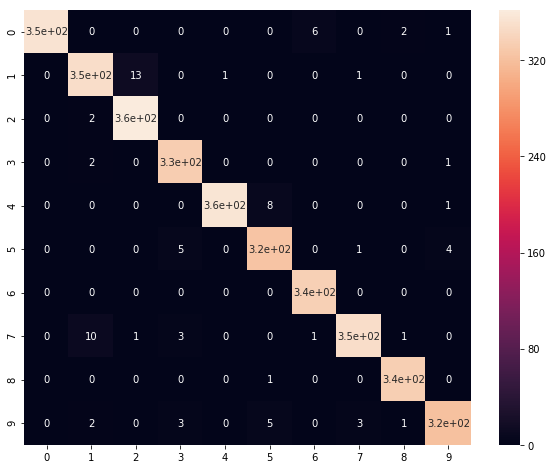

In [22]:
import seaborn as sn

df_cm = pd.DataFrame(matrix_knn, index = [i for i in "0123456789"],columns = [i for i in "0123456789"])
plt.figure(figsize = (10,8))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sn.heatmap(df_cm, annot=True)

Much better than the one with Logistic Regression

**Task 4**

As in all neural network training, you need to find the optimal values of your hyperparameters.

Plot a graph of test accuracy vs k for a lot of values of k and decide the best k.

Solution:

In [23]:
#Score=[]
#for i in range(1,50):
    #knn_model=KNN(i)
    #knn_model.load(train_data, X_columns, y_columns)
    #y_pred = knn_model.predict(X_test)
    
    #score = accuracy_score(y_test,y_pred)
    #print("For k = ", i, " the score is ",score)
    
#plt.plot(Score)

The code I wrote was taking way too much time to calculate the accuracy.<br> That is why I decided use the scikit library

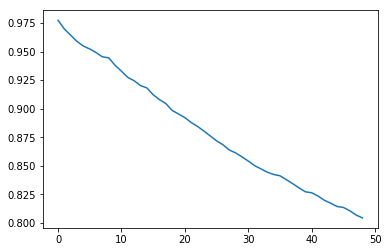

In [24]:
Scores = []
n=50

#print(y_test)

for i in range(1,n):
    from sklearn.neighbors import KNeighborsRegressor
    #from sklearn.metrics import mean_squared_error
    
    knn_model_scikit = KNeighborsRegressor(n_neighbors=i)
    knn_model_scikit.fit(X_train, y_train)
    y_pred = knn_model_scikit.predict(X_test)
    
    #mse = mean_squared_error(y_test, y_pred)
    #print("For k = ", i, " the score is ",mse)
    #print(y_pred.astype(int)," ")
    #print(" ")
    
    from sklearn.metrics import accuracy_score
    Scores.append(accuracy_score(y_test, y_pred.astype(int)))
    
plt.plot(Scores)

As we can see that the value of k that gives best accuracy is near 1
hence k=1 is best option we can use

**Task 5**

Good job until now! But, to decide the hyperparameters using the test accuracy is not the best way. Why?

Solution:

Deciding hyperparameters using test accuracy is not a good, it may seem like we are using a completely new data, but as the test data 'used' to decide tune the parameter, it is no longer independent. That is why something like cross validation error is used